nr of spikes: 9
spikes times: [ 0.52579   0.57949   0.63884   0.698015  0.757195  0.816375  0.875555
  0.934735  0.993915] s


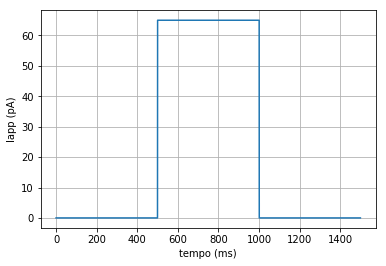

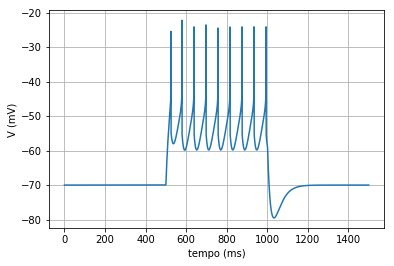

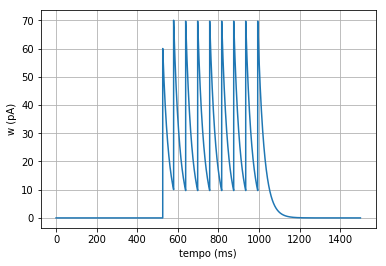

In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex. tools import input_factory

####
v_rest= -70*b2.mV #EL

firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

v_max = 20*b2.mV

membrane_resistence = 500*b2.Mohm
conductance_L = 1/membrane_resistence
###
tau_m = 20*b2.ms
tau_w = 30*b2.ms
v_reset= -55*b2.mV #Vreset
a = 0*b2.nsiemens
b = 60*b2.pA

membrane_capacitance = tau_m/membrane_resistence

current = 65
input_current = input_factory.get_step_current(
t_start=500, t_end=1000, unit_time=b2.ms,
amplitude=current*b2.pA) 

simulation_time = 1500
dt =  0.005 * b2.ms 
# differential equation of Leaky Integrate-and-Fire model
eqs = """

dv/dt = (conductance_L/membrane_capacitance)*(v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a/tau_w) * (v - v_rest) - (w/tau_w) : ampere
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b", threshold="v>v_max", method="euler", dt=dt)
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

print("nr of spikes: {}".format(spike_monitor.count[0]))
print("spikes times: {}".format(spike_monitor.t[:]))

plt.figure(1)
c = input_current(state_monitor.t, 0)
plt.plot(state_monitor.t/b2.ms, c/b2.pA )
plt.xlabel('tempo (ms)')
plt.ylabel('Iapp (pA)')
plt.grid()
plt.figure(2)
#axis_v = plt.subplot(312)

plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)
plt.xlabel('tempo (ms)')
plt.ylabel('V (mV)')
plt.grid()
#plt.legend(["vm", "firing threshold"], fontsize=12)
plt.figure(3)

plt.plot(state_monitor.t/b2.ms, state_monitor.w[0]/b2.pA)
plt.grid()
plt.xlabel('tempo (ms)')
plt.ylabel('w (pA)')

plt.show()#%%
